In [ ]:
###··· TURBINE DATASET ···### 
# Part 1: Selecting and analyzing the dataset
import pandas as pd
from DataPreprocessing import DataPreprocessing


#Load the dataset
turbine_dataset = pd.read_csv("A1-turbine.txt", sep='\t', header=0)
x = turbine_dataset[['#height_over_sea_level', 'fall', 'net_fall', 'flow']] 
y = turbine_dataset[["power_of_hydroelectrical_turbine"]]
#Scale the data
preprocessor = DataPreprocessing()
x_scaled = preprocessor.scale(x.values, 0.1, 0.9)
y_scaled = preprocessor.scale(y.values, 0.1, 0.9)
validation_percentage=0.15


In [ ]:
from matplotlib import pyplot as plt
from MyNeuralNetwork import MyNeuralNetwork

#Create the neural network and train
nn = MyNeuralNetwork(layers=[x_scaled.shape[1],9,5,1], nEpochs=50, learning_rate=0.05, momentum=0.005, activation='relu', validation_set=validation_percentage)
nn.fit(x_scaled, y_scaled)

# Optional: Plot the evolution of the training and validation errors  
(loss, val_loss) = nn.loss_epochs()
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

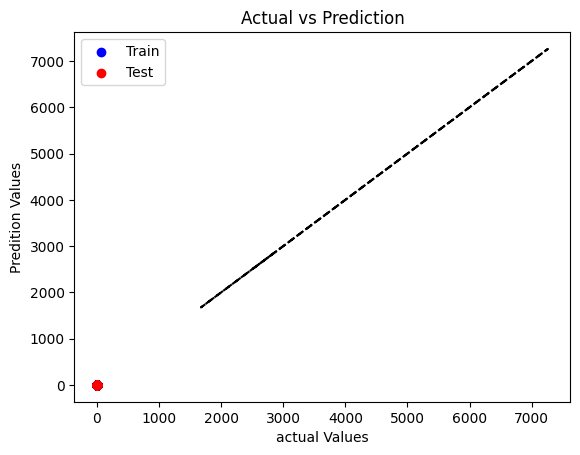

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *


# Part 3: Obtaining predictions
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=validation_percentage, shuffle=True)
y_pred_test = nn.predict(x_test)
y_pred_train = nn.predict(x_train)

print("---Test---")
print("R2 Score: ", r2_score(y_test, y_pred_test))
print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("MAE: ", mean_absolute_error(y_test, y_pred_test))
print("---Train---")
print("R2 Score: ", r2_score(y_train, y_pred_train))
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("")
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred_test))

y_test_unscaled = preprocessor.inverse_scale(y_test)
y_pred_test_unscaled = preprocessor.inverse_scale(y_pred_test)
y_train_unscaled = preprocessor.inverse_scale(y_train)
y_pred_train_unscaled = preprocessor.inverse_scale(y_pred_train)

plt.scatter(y_train_unscaled, y_pred_train_unscaled, color="blue", label="Train")
plt.scatter(y_test_unscaled, y_pred_test_unscaled, color="red", label="Test")
plt.xlabel("actual Values")
plt.ylabel("Predition Values")
plt.title("Actual vs Prediction")
plt.plot(y, y, "--",color="black")
plt.legend()
plt.show()